In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset with pipe '|' as delimiter
data = pd.read_csv("../data/MachineLearningRating_v3.txt", sep='|', low_memory=False)

# Display dataset structure
print("Dataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())
# Inspect unique values in the columns with mixed types
print(data.iloc[:, 32].unique())  # ExcessSelected
print(data.iloc[:, 37].unique())  # StatutoryRiskType

# Optionally convert to consistent types (e.g., strings)
data.iloc[:, 32] = data.iloc[:, 32].astype(str).str.strip()
data.iloc[:, 37] = data.iloc[:, 37].astype(str).str.strip()

# Display first few rows
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


                         Missing Values  Percentage
NumberOfVehiclesInFleet         1000098  100.000000
CustomValueEstimate              779642   77.956560
WrittenOff                       641901   64.183810
Rebuilt                          641901   64.183810
Converted                        641901   64.183810
NewVehicle                       153295   15.327998
Bank                             145961   14.594670
AccountType                       40232    4.022806
Gender                             9536    0.953507
MaritalStatus                      8259    0.825819
mmcode                              552    0.055195
VehicleType                         552    0.055195
bodytype                            552    0.055195
kilowatts                           552    0.055195
cubiccapacity                       552    0.055195
Cylinders                           552    0.055195
Model                               552    0.055195
make                                552    0.055195
NumberOfDoor

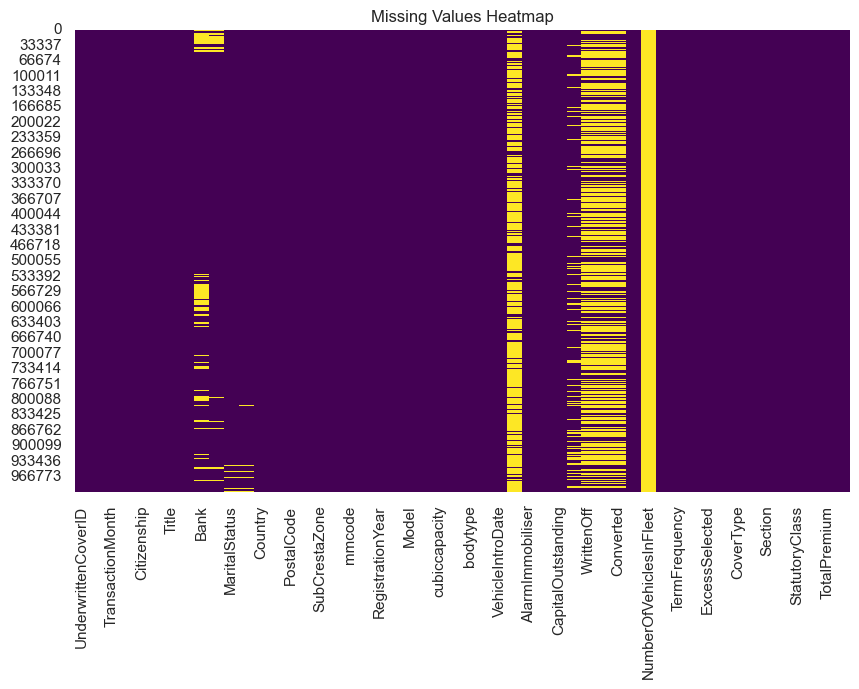

In [4]:
# Check missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
})
print(missing_summary[missing_summary["Missing Values"] > 0].sort_values(by="Percentage", ascending=False))

# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
# Drop columns with more than 60% missing values
columns_to_drop = ['NumberOfVehiclesInFleet', 'CustomValueEstimate', 
                   'WrittenOff', 'Rebuilt', 'Converted']
data_cleaned = data.drop(columns=columns_to_drop)

# Impute missing categorical values with mode
categorical_columns_to_impute = ['Bank', 'AccountType', 'Gender', 'MaritalStatus']
for col in categorical_columns_to_impute:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

# Verify remaining missing values
missing_values_after_cleaning = data_cleaned.isnull().sum()
print("Remaining Missing Values:\n", missing_values_after_cleaning[missing_values_after_cleaning > 0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10252\2518186215.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)


Remaining Missing Values:
 mmcode                 552
VehicleType            552
make                   552
Model                  552
Cylinders              552
cubiccapacity          552
kilowatts              552
bodytype               552
NumberOfDoors          552
VehicleIntroDate       552
NewVehicle          153295
dtype: int64


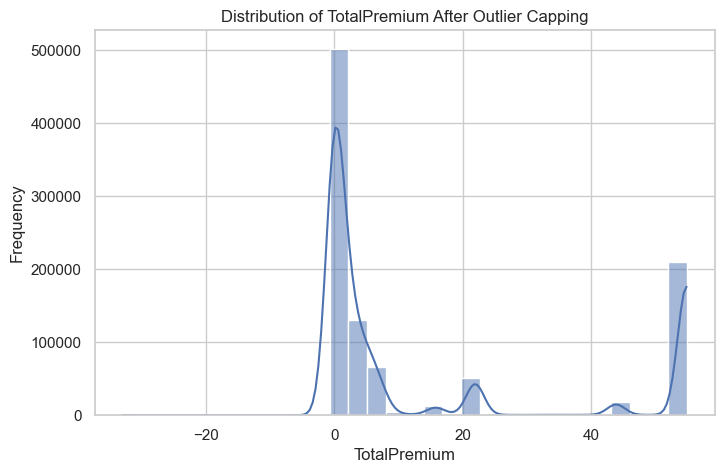

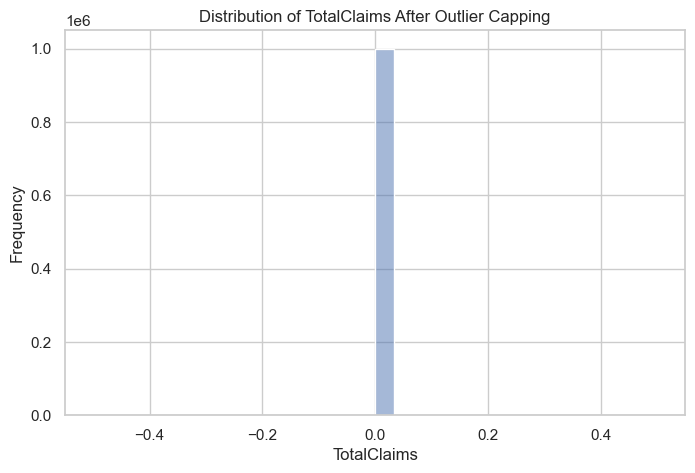

In [9]:
# Define a function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Cap outliers in TotalPremium and TotalClaims
outlier_columns = ['TotalPremium', 'TotalClaims']
for col in outlier_columns:
    cap_outliers(data_cleaned, col)

# Visualize the distributions after handling outliers
for col in outlier_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} After Outlier Capping")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [10]:
# Descriptive statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)

# Count of unique values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

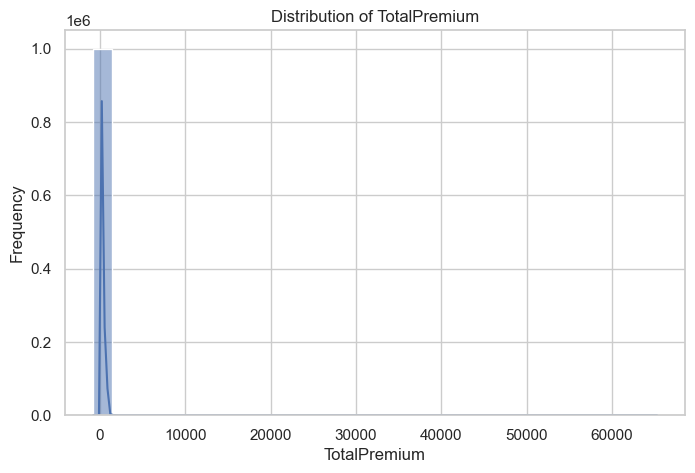

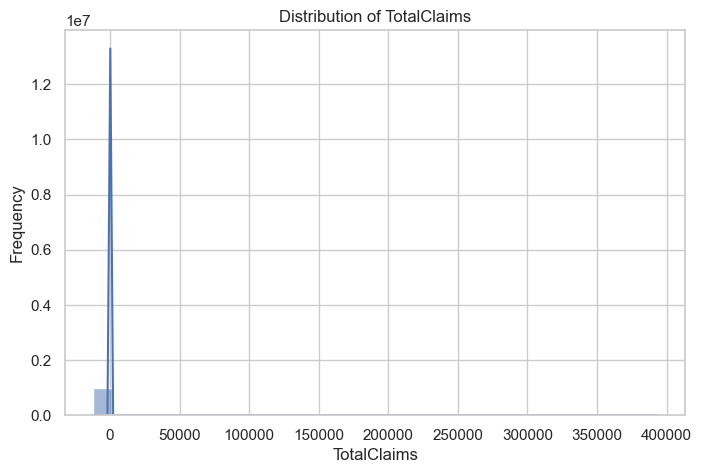

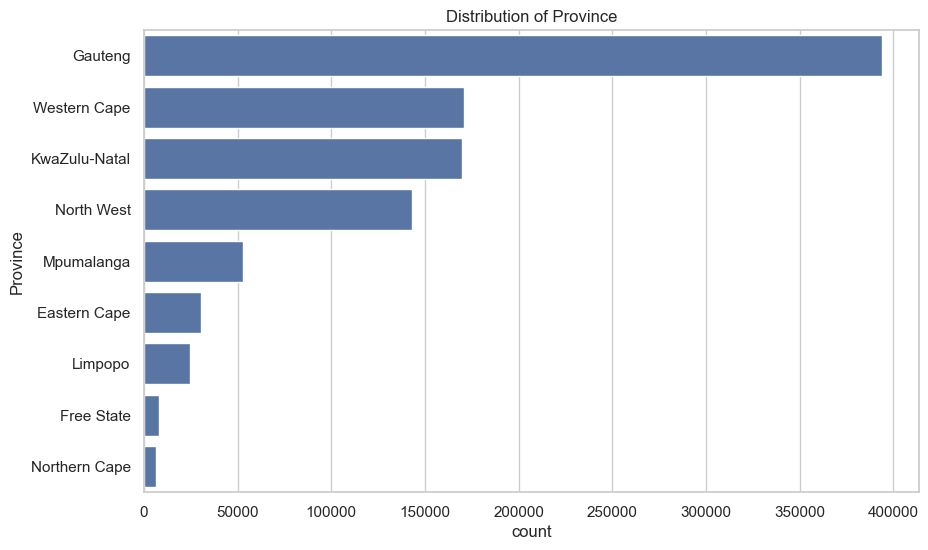

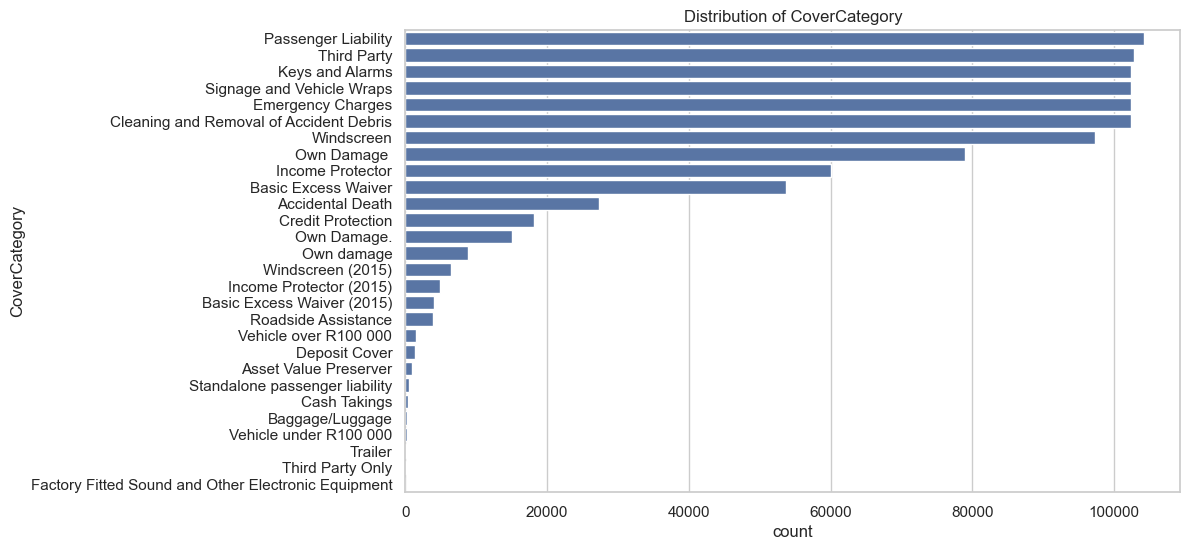

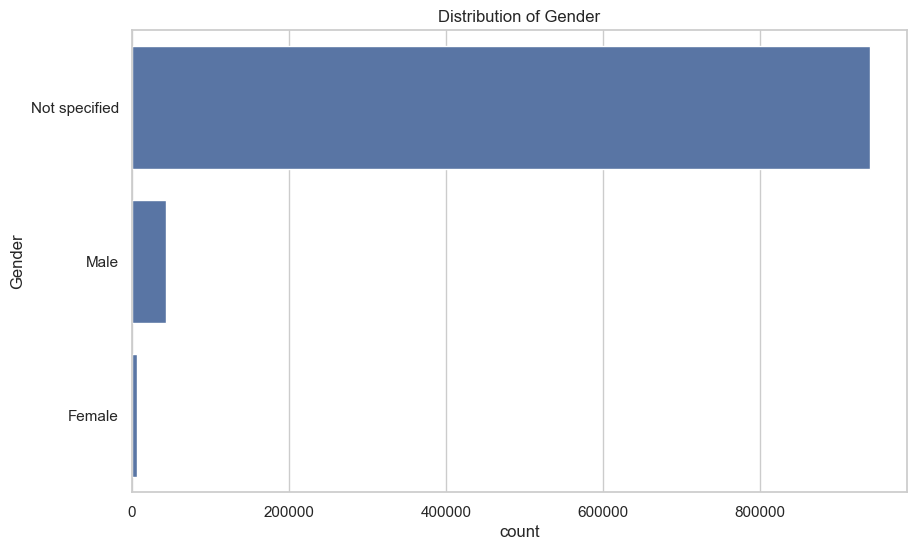

In [11]:
# Numerical distribution plots
key_columns = ['TotalPremium', 'TotalClaims']
for col in key_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Categorical column visualizations
categorical_cols_to_plot = ['Province', 'CoverCategory', 'Gender']
for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

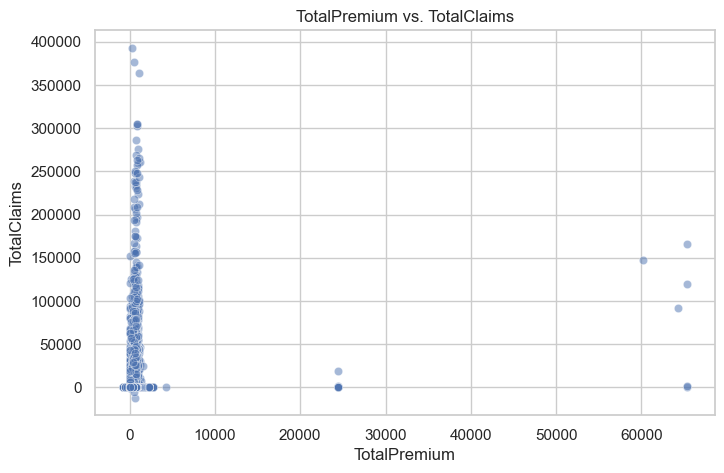

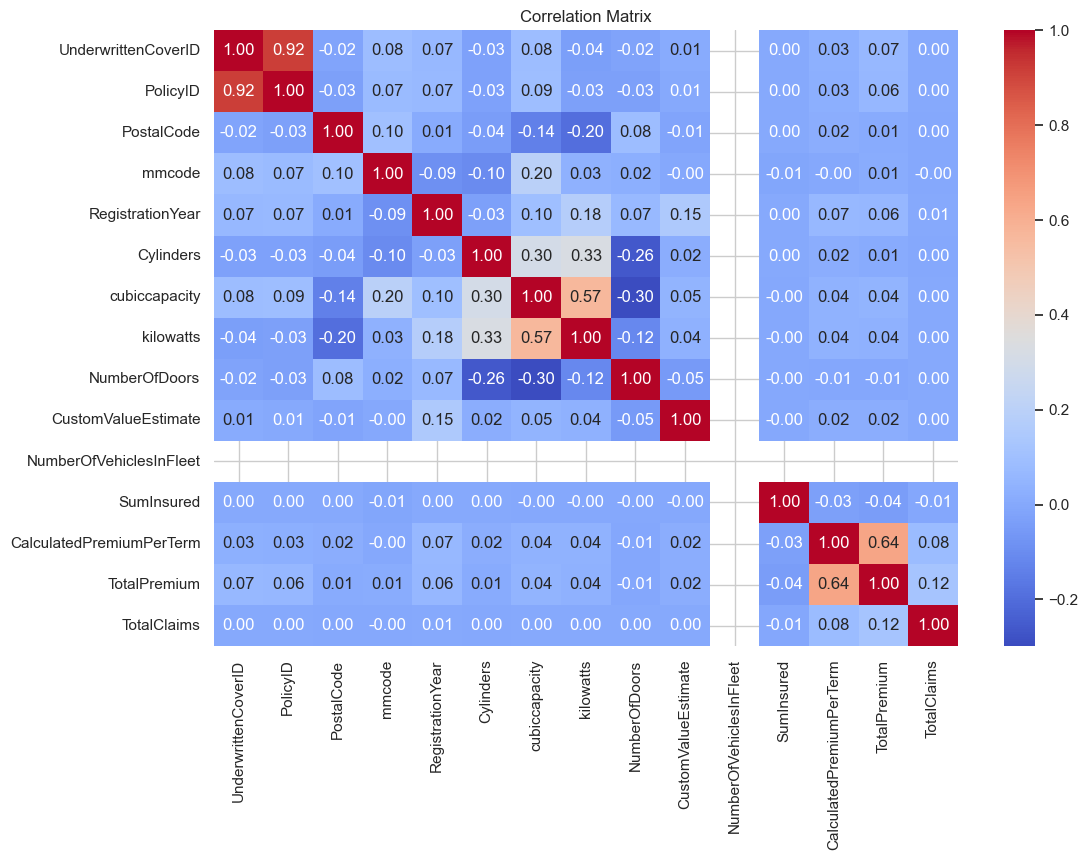

In [12]:
# Scatterplot for numerical relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, alpha=0.5)
plt.title("TotalPremium vs. TotalClaims")
plt.show()

# Correlation heatmap
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

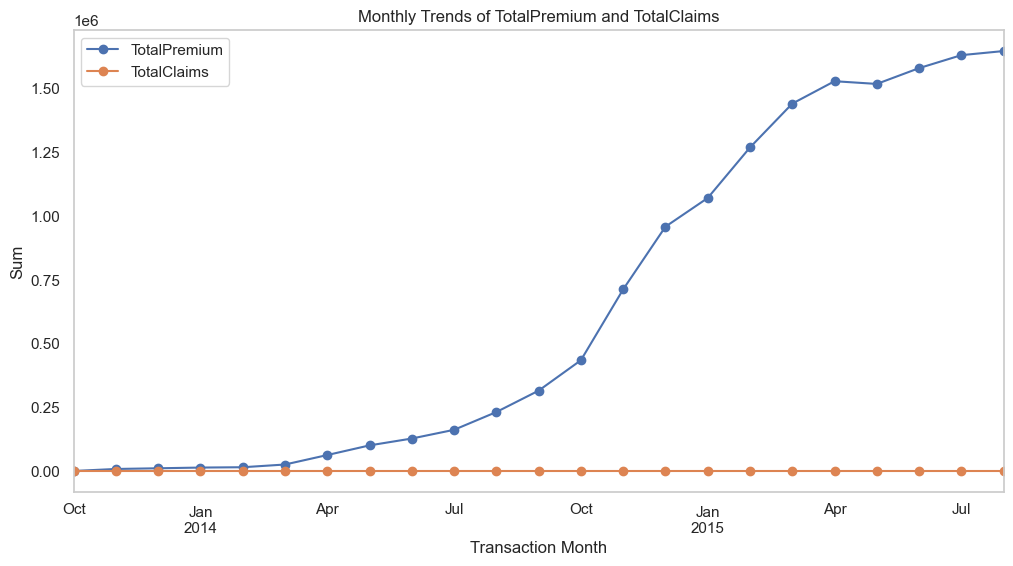

In [13]:
# Convert TransactionMonth to datetime
data_cleaned['TransactionMonth'] = pd.to_datetime(data_cleaned['TransactionMonth'])

# Analyze trends over time
monthly_trends = data_cleaned.groupby(data_cleaned['TransactionMonth'].dt.to_period("M"))[['TotalPremium', 'TotalClaims']].sum()

# Plot trends
monthly_trends.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Trends of TotalPremium and TotalClaims")
plt.xlabel("Transaction Month")
plt.ylabel("Sum")
plt.legend(["TotalPremium", "TotalClaims"])
plt.grid()
plt.show()

CoverCategory Distribution Across Provinces (in %):
 Province                                            Eastern Cape  Free State  \
CoverCategory                                                                  
Accidental Death                                        5.580828    6.506976   
Asset Value Preserver                                   0.032964    0.000000   
Baggage/Luggage                                         0.112078    0.000000   
Basic Excess Waiver                                     7.077400    6.667490   
Basic Excess Waiver (2015)                              0.260417    0.074083   
Cash Takings                                            0.000000    0.000000   
Cleaning and Removal of Accident Debris                 9.909019    9.717249   
Credit Protection                                       1.539425    1.345845   
Deposit Cover                                           0.240638    0.160514   
Emergency Charges                                       9.909019   

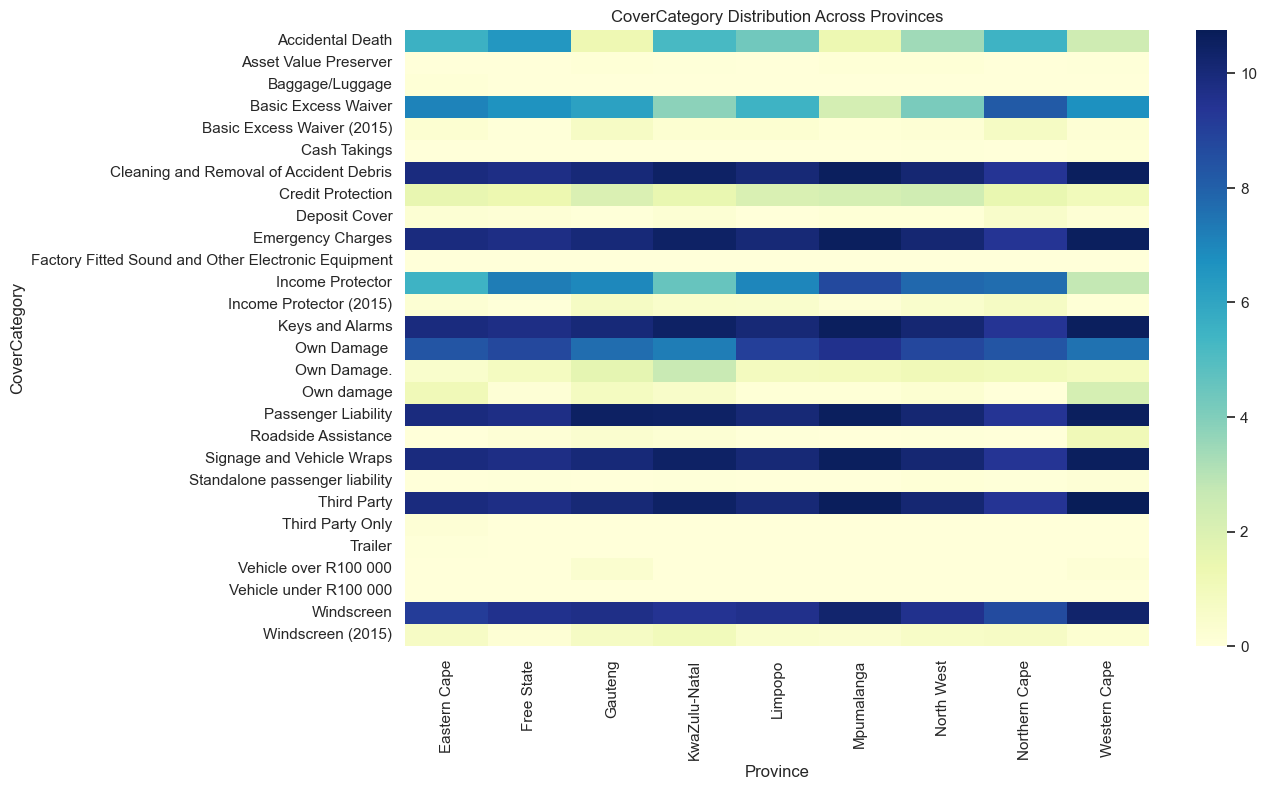

In [14]:
# Analyze CoverCategory distribution across Provinces
cover_category_province = pd.crosstab(data_cleaned['CoverCategory'], data_cleaned['Province'], normalize='columns') * 100
print("CoverCategory Distribution Across Provinces (in %):\n", cover_category_province)

# Visualize with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cover_category_province, annot=False, cmap="YlGnBu", cbar=True)
plt.title("CoverCategory Distribution Across Provinces")
plt.xlabel("Province")
plt.ylabel("CoverCategory")
plt.show()